# Assignment 2 - Question 4
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q4.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: <br>
Roll Number:

## Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [13]:
import csv
import random
import numpy as np

In [14]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = np.array([x[0] for x in all_molecules[:num_train]])
# each point in y_train has 1 value - the bandgap of the molecule
y_train = np.array([x[1] for x in all_molecules[:num_train]])

x_test = np.array([x[0] for x in all_molecules[num_train:]])
y_test = np.array([x[1] for x in all_molecules[num_train:]])

In [15]:
import pandas as pd


### 4.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

4.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

<!-- your answer to 1.1.1 -->

4.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

4.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [16]:
class linear_regression():
    def __init__(self, learning_rate):
        self.parameters = None
        self.learning_rate = learning_rate
    def fit(self, x_train, y_train, epochs):
        self.parameters, gradient = np.zeros(x_train[0].shape), np.zeros(x_train[0].shape)
        bias_gradient = 0
        self.bias = 0
        loss = 0
        for _ in range(epochs):
            loss = 0
            diff = 0
            for i in range(len(x_train)):
                y_temp = np.dot(self.parameters, x_train[i]) + self.bias
                diff = y_temp - y_train[i]
                loss += diff**2
                gradient += 2*x_train[i]*diff
                bias_gradient += diff
            gradient /= len(x_train)
            bias_gradient  /= len(x_train)
            loss /= len(x_train)
            self.parameters -= self.learning_rate*(gradient)
            self.bias -= self.learning_rate*(bias_gradient)    
    def predict(self, x):
        y_pred = []
        for i in range(len(x)):
            y_pred += [np.dot(self.parameters, x[i]) + self.bias]
        y_pred = np.array(y_pred)
        return y_pred
x = linear_regression(0.03)
x.fit(x_train, y_train, 10000)

In [17]:
print(sum((x.predict(x_test) - y_test)**2))

[2.527606207189069]
[1.6921964510553495]
[1.6754810403862925]
[1.6931740631399121]
[1.7708402429857122]
[1.5625201846817276]
[2.0569178507839703]
[1.7223739564765528]
[3.0597598645578854]
[2.5546080506258457]
[2.7670753530050365]
[1.7102454784985621]
[1.7654068003110142]
[1.7618212935201725]
[1.773901174102561]
[2.199838945713301]
[1.60061310047332]
[1.883892468338751]
[1.585622351412244]
[1.5387806854522983]
[2.731598442513782]
[2.6783830767769006]
0.08285040938876123


4.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

[2.527606207189069]
[1.6921964510553495]
[1.6754810403862925]
[1.6931740631399121]
[1.7708402429857122]
[1.5625201846817276]
[2.0569178507839703]
[1.7223739564765528]
[3.0597598645578854]
[2.5546080506258457]
[2.7670753530050365]
[1.7102454784985621]
[1.7654068003110142]
[1.7618212935201725]
[1.773901174102561]
[2.199838945713301]
[1.60061310047332]
[1.883892468338751]
[1.585622351412244]
[1.5387806854522983]
[2.731598442513782]
[2.6783830767769006]


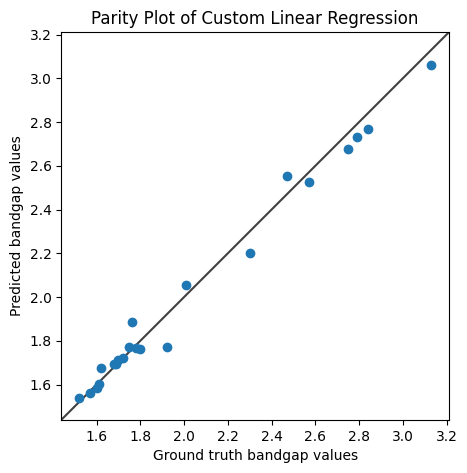

In [18]:
# Get the predictions of x_test into `y_pred`


# ...
#

y_pred = x.predict(x_test)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 10))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 4.2 Implement Ridge regression
4.2.1 Explain Ridge regression briefly in 1-2 lines.

<!-- Your answer to 1.2.1 -->

4.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

In [19]:
# you should not have imported sklearn before this point
import sklearn

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

### 4.3 Implement Lasso regression
4.3.1 Explain Lasso regression briefly in 1-2 lines.

4.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

In [20]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`